# Набор данных

**Оценка стоимости  и типа трансмиссии по данным продаж автомобилей на вторичном рынке Молдавии**

Набор данных представляет собой статистику параметров автомобилей на вторичном рынке в Молдавии.

Набор включает ряд категориальных и численных значений, составляющих одну запись (строку). Число записей можно найти как число строк.

Каждый столбец в записи — это отдельный параметр.

Среди указанных параметров приведены целевой для задачи предсказания (регрессии) - цена автомобиля.

 Также среди параметров есть целевой для задачи классификации - тип трансмиссии.

 Последняя задача может быть рассмотрена, например, как пример задачи на заполнение пропусков (если продавец не указал соответствующий параметр).

## Import библиотек

In [ ]:
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
plt.style.use('dark_background')

Функция чтобы посчитал кросс-валидацию

In [ ]:
def cross_validation (X, y, model, scoring, cv_rule):
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_poly = pd.DataFrame(scores)
    display(DF_poly)
    print('\n')
    print(DF_poly.mean()[2:])

Функция чтобы нарисовать значимость признаков

In [ ]:
def feature_importance_plotter(model, features_names):
    feature_importance = model.feature_importances_

    sorted = np.argsort(feature_importance)

    ypos = np.arange(len(features_names))

    fig= plt.figure(figsize=(8,4))
    plt.barh(ypos, feature_importance[sorted])
    plt.xlim([0,1])
    plt.ylabel('Параметры')
    plt.xlabel('Значимость')
    plt.yticks(ypos,features_names[sorted] );

## Считываем файл в DataFrame



метод `.read_csv(path,delimiter) `

In [ ]:
DF = pd.read_csv('https://raw.githubusercontent.com/dayekb/Basic_ML_Alg/main/cars_moldova_cat_num.csv', delimiter = ',')
DF

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),km_year
0,40,92,2011,4,195000.0,1800.0,2,1,7750.0,17727.272727
1,32,62,2014,11,135000.0,1500.0,0,0,8550.0,16875.000000
2,32,71,2012,11,110000.0,1500.0,0,0,6550.0,11000.000000
3,28,23,2006,11,200000.0,1600.0,3,0,4100.0,12500.000000
4,23,124,2000,5,300000.0,2200.0,0,0,3490.0,13636.363636
...,...,...,...,...,...,...,...,...,...,...
32069,42,88,2016,10,88000.0,1800.0,4,1,11500.0,14666.666667
32070,19,53,2002,3,225000.0,1800.0,3,0,4400.0,11250.000000
32071,6,77,2015,11,89000.0,1500.0,0,0,7000.0,12714.285714
32072,22,10,2006,1,370000.0,2000.0,0,0,4000.0,23125.000000


# Классификация

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1

In [ ]:
scoring = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

cv_clf = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)

In [ ]:
X = DF.drop(columns = ["Transmission"]).values
y = DF["Transmission"].values
features_names = DF.drop(columns = ["Transmission"]).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Случайный Лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#@title ГиперПараметры Случайного Леса{ run: "auto" }
n_estimators=150 #@param {type:"slider", min:50, max:250, step:50}
max_depth=10 #@param {type:"slider", min:2, max:25, step:1}



RF_clf=RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                            oob_score=True          )

RF_clf.fit(X_train, y_train)

y_predict=RF_clf.predict(X_test)



Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,8.333573,0.522521,0.857715,0.836948,0.883145,0.795344
1,7.919380,0.268310,0.864143,0.843349,0.896288,0.796314
2,8.147062,0.123542,0.856125,0.835456,0.879828,0.795344
3,3.640867,0.116089,0.863474,0.844298,0.886400,0.806014
4,3.626007,0.110469,0.859688,0.838213,0.890344,0.791849




test_ACC          0.860229
test_F1           0.839653
test_Precision    0.887201
test_Recall       0.796973
dtype: float64
              precision    recall  f1-score   support

      Manual       0.85      0.92      0.88      5253
   Automatic       0.89      0.80      0.85      4370

    accuracy                           0.87      9623
   macro avg       0.87      0.86      0.86      9623
weighted avg       0.87      0.87      0.87      9623



In [ ]:
cross_validation (X_train, y_train,
                  RF_clf, scoring,
                  cv_clf)

print (classification_report(y_test, y_predict, target_names=['Manual','Automatic']))

In [ ]:
RF_clf.oob_score_

0.8597835285733375

**Значимые Параметры**

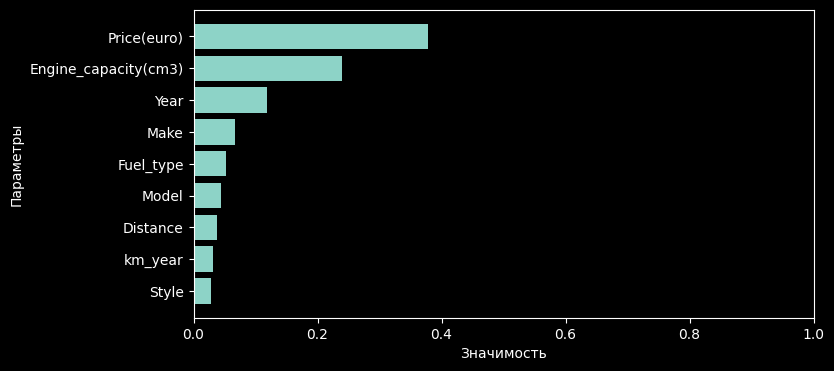

In [ ]:
feature_importance_plotter(RF_clf, features_names)

## Бустинг

### Адаптивный Бустинг

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#@title **Настройка гиперпараметров классификатора:** { run: "auto" }
n_estimators=100 #@param {type:"slider", min:5, max:100, step:5}
learning_rate=0.05 #@param {type:"slider", min:0.00, max:1, step:0.05}


ABС=AdaBoostClassifier(n_estimators=n_estimators,
                          learning_rate=learning_rate,
                       )

ABС.fit(X_train, y_train)

y_predict=ABС.predict(X_test)

In [ ]:
cross_validation (X_train, y_train,
                  ABС, scoring,
                  cv_clf)

print (classification_report(y_test, y_predict, target_names=['Manual','Automatic']))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,1.835629,0.075002,0.815409,0.783720,0.848108,0.728419
1,1.474101,0.072705,0.824276,0.793401,0.862265,0.734724
2,1.482818,0.087259,0.820267,0.791849,0.845730,0.744423
3,1.476607,0.077589,0.825390,0.798871,0.848039,0.755092
4,1.489606,0.076293,0.815145,0.785085,0.841755,0.735565




test_ACC          0.820097
test_F1           0.790586
test_Precision    0.849179
test_Recall       0.739645
dtype: float64


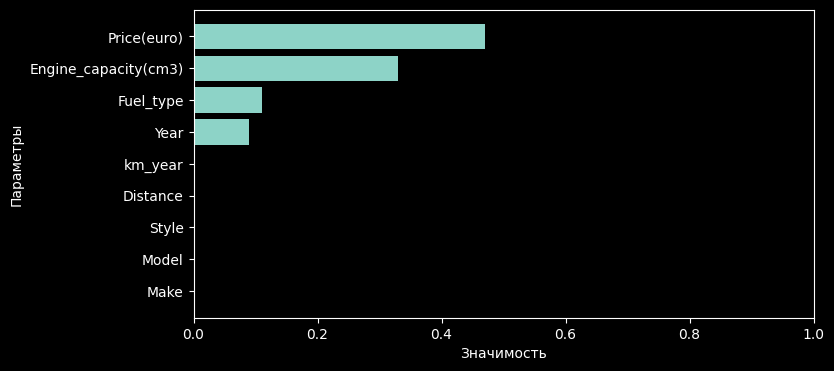

In [ ]:
feature_importance_plotter(ABС, features_names)

ВЕСА поломаны для классификации

In [ ]:
ABС.estimator_weights_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Ошибки отдельных предсказателей

In [ ]:
ABС.estimator_errors_

array([0.2254688 , 0.2364276 , 0.24788983, 0.25904826, 0.26560116,
       0.27484343, 0.28589367, 0.30820122, 0.30148398, 0.32100567,
       0.30961149, 0.31104368, 0.33586905, 0.32118475, 0.3260988 ,
       0.34908161, 0.33184672, 0.34014415, 0.36942786, 0.34459749,
       0.35271813, 0.34829745, 0.35972673, 0.38699588, 0.38300688,
       0.36085322, 0.3676672 , 0.40759583, 0.39296643, 0.38976701,
       0.37016883, 0.41502611, 0.39068273, 0.40590027, 0.42086961,
       0.38080606, 0.3810056 , 0.42164108, 0.40342279, 0.42705685,
       0.42703931, 0.41473139, 0.40848009, 0.39222735, 0.43553457,
       0.40291728, 0.40663364, 0.43948559, 0.43638424, 0.40166718,
       0.4206102 , 0.43721578, 0.44415261, 0.42760126, 0.40808059,
       0.44768022, 0.44515504, 0.44851954, 0.41267151, 0.41156502,
       0.43669088, 0.44483056, 0.41442994, 0.41437057, 0.44264894,
       0.4551248 , 0.45681314, 0.41625856, 0.45464286, 0.42329321,
       0.41946772, 0.45254468, 0.41920624, 0.44408447, 0.42833

### Градиентный Бустинг

In [ ]:
import xgboost as xg

In [ ]:
model = xg.XGBClassifier(random_state = 42,
                         learning_rate=0.01,
                           n_estimators = 500
                         )
model.fit(X_train,y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
        )

y_predict=model.predict(X_test)

[0]	validation_0-logloss:0.68786	validation_1-logloss:0.68782
[1]	validation_0-logloss:0.68268	validation_1-logloss:0.68260
[2]	validation_0-logloss:0.67759	validation_1-logloss:0.67748
[3]	validation_0-logloss:0.67261	validation_1-logloss:0.67247
[4]	validation_0-logloss:0.66772	validation_1-logloss:0.66755
[5]	validation_0-logloss:0.66293	validation_1-logloss:0.66271
[6]	validation_0-logloss:0.65822	validation_1-logloss:0.65798
[7]	validation_0-logloss:0.65361	validation_1-logloss:0.65332
[8]	validation_0-logloss:0.64908	validation_1-logloss:0.64876
[9]	validation_0-logloss:0.64463	validation_1-logloss:0.64428
[10]	validation_0-logloss:0.64027	validation_1-logloss:0.63990
[11]	validation_0-logloss:0.63599	validation_1-logloss:0.63560
[12]	validation_0-logloss:0.63178	validation_1-logloss:0.63137
[13]	validation_0-logloss:0.62763	validation_1-logloss:0.62720
[14]	validation_0-logloss:0.62358	validation_1-logloss:0.62313
[15]	validation_0-logloss:0.61957	validation_1-logloss:0.61911
[1

In [ ]:
print("Лучшая Итерация: {}".format(model.get_booster().best_iteration))

Лучшая Итерация: 499


In [ ]:
cross_validation (X_train, y_train,
                  model, scoring,
                  cv_clf)

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,10.421188,0.057353,0.856825,0.836011,0.881657,0.794859
1,8.346507,0.059358,0.857906,0.837245,0.883208,0.795829
2,10.188644,0.056266,0.853675,0.833037,0.875067,0.794859
3,10.355520,0.056706,0.860356,0.841226,0.880233,0.805529
4,10.191710,0.056481,0.854120,0.832180,0.881650,0.787967




test_ACC          0.856577
test_F1           0.835940
test_Precision    0.880363
test_Recall       0.795809
dtype: float64


In [ ]:
print (classification_report(y_test, y_predict, target_names=['Manual','Automatic']))

              precision    recall  f1-score   support

      Manual       0.85      0.91      0.88      5253
   Automatic       0.88      0.80      0.84      4370

    accuracy                           0.86      9623
   macro avg       0.86      0.86      0.86      9623
weighted avg       0.86      0.86      0.86      9623



**Значимые Параметры**

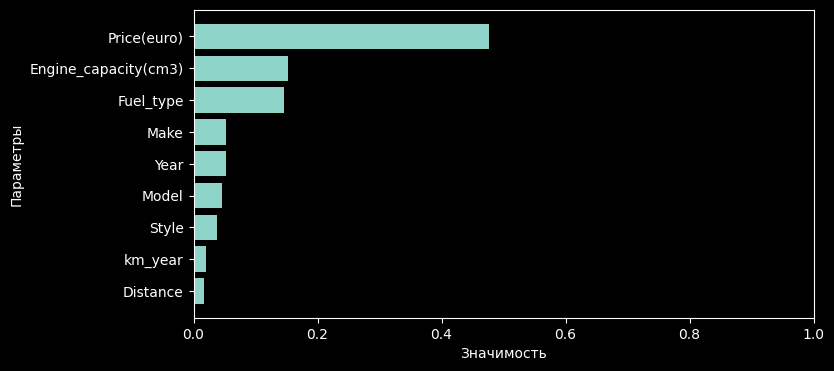

In [ ]:
feature_importance_plotter(model, features_names)

In [ ]:
results = model.evals_result()

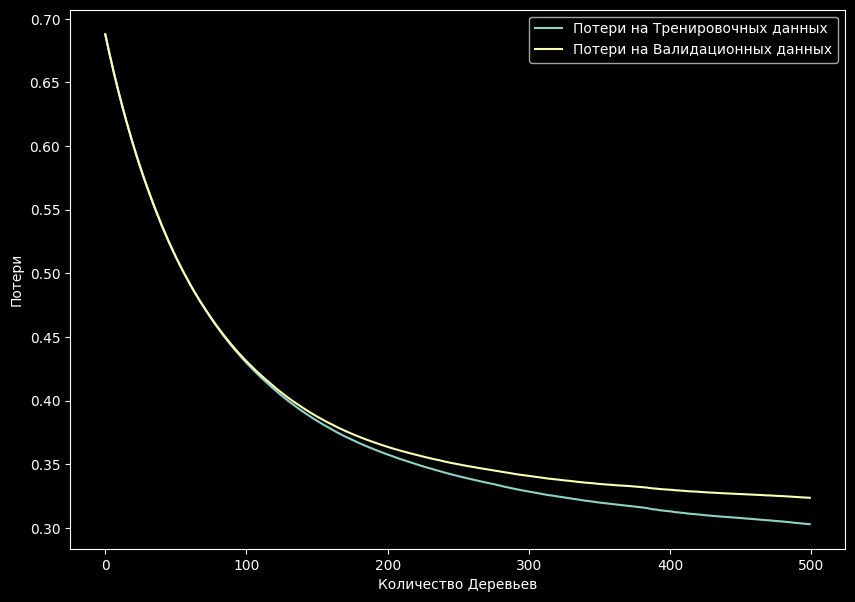

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["logloss"], label="Потери на Тренировочных данных")
plt.plot(results["validation_1"]["logloss"], label="Потери на Валидационных данных")
plt.xlabel("Количество Деревьев")
plt.ylabel("Потери")
plt.legend();

# Регрессия

In [ ]:
from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

Функция которая пишет отчет по ошибкам регрессии (на минималках)

In [ ]:
def regression_report(y_test,y_predict):
    print('Ошибка на тестовых данных')
    print('MSE: %.1f' % mse(y_test,y_predict))
    print('RMSE: %.1f' % mse(y_test,y_predict,squared=False))

    print('R2 : %.4f' %  r2_score(y_test,y_predict))

In [ ]:
scoring_reg = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}

In [ ]:
cv_reg = ShuffleSplit(n_splits=5, random_state=42)

**Считываем данные, разбиваем на тестовую и тренировочную, нормализуем**

In [ ]:
X_reg = DF.drop(columns = ["Price(euro)"]).values
y_reg = DF["Price(euro)"].values
features_names_reg = DF.drop(columns = ["Price(euro)"]).columns


X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

## Случайный Лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#@title ГиперПараметры Случайного Леса{ run: "auto" }
n_estimators=150 #@param {type:"slider", min:50, max:250, step:50}
max_depth=10 #@param {type:"slider", min:2, max:25, step:1}



RF_reg=RandomForestRegressor(n_estimators=n_estimators,
                                max_depth=max_depth,
                            oob_score=True          )

RF_reg.fit(X_reg_train, y_reg_train)

y_predict=RF_reg.predict(X_reg_test)

In [ ]:
cross_validation (X_reg_train, y_reg_train,
                  RF_reg, scoring_reg,
                  cv_reg)

regression_report(y_reg_test,y_predict)

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,7.669486,0.049949,0.838360,-1.371598e+07,-2045.072077,-43369.179749
1,8.497971,0.050483,0.863047,-1.397056e+07,-2078.748696,-32926.734615
2,8.151615,0.066231,0.804460,-1.713005e+07,-2093.658882,-97334.397436
3,7.884198,0.053094,0.816960,-1.754455e+07,-2078.883871,-89896.170974
4,8.426175,0.058150,0.852639,-1.343400e+07,-2072.402014,-46447.870494




test_R2      8.350933e-01
test_-MSE   -1.515903e+07
test_-MAE   -2.073753e+03
test_Max    -6.199487e+04
dtype: float64
Ошибка на тестовых данных
MSE: 16066634.9
RMSE: 4008.3
R2 : 0.8356


In [ ]:
RF_reg.oob_score_

0.8128773933600241

**Значимые Параметры**

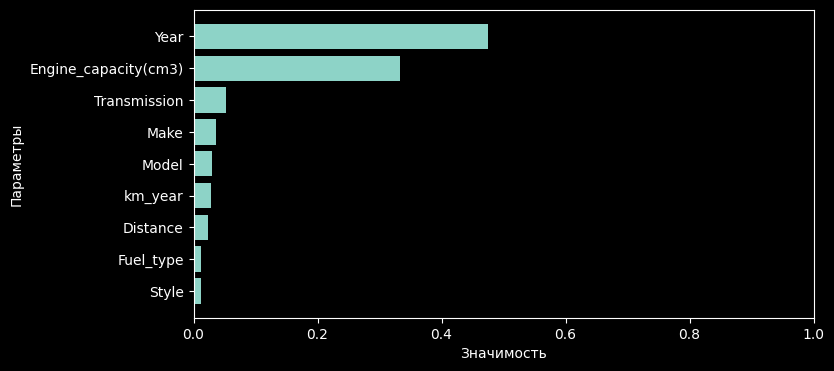

In [ ]:
feature_importance_plotter(RF_reg, features_names_reg)

## Бустинг

### Адаптивный Бустинг

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
#@title ### **Настройка гиперпараметров:** { run: "auto" }
n_estimators=80 #@param {type:"slider", min:10, max:200, step:10}
learning_rate=1 #@param {type:"slider", min:0.00, max:1, step:0.05}


ABR = AdaBoostRegressor(learning_rate=learning_rate,
                        n_estimators=n_estimators,
                         )


ABR.fit(X_reg_train, y_reg_train)

y_predict=ABR.predict(X_reg_test)

In [ ]:
cross_validation (X_reg_train, y_reg_train,
                  ABR, scoring_reg,
                  cv_reg)

regression_report(y_reg_test,y_predict)

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.638698,0.008392,0.561405,-3.721711e+07,-4198.374311,-42962.910518
1,0.439765,0.005235,0.638877,-3.683816e+07,-3982.952584,-50504.212413
2,0.293097,0.003510,0.550856,-3.934668e+07,-4323.236968,-93160.556427
3,0.309093,0.004476,0.530274,-4.502352e+07,-4486.195179,-89297.899823
4,0.273495,0.010055,0.674463,-2.967724e+07,-3600.900020,-52020.270520




test_R2      5.911753e-01
test_-MSE   -3.762054e+07
test_-MAE   -4.118332e+03
test_Max    -6.558917e+04
dtype: float64
Ошибка на тестовых данных
MSE: 36938562.8
RMSE: 6077.7
R2 : 0.6221


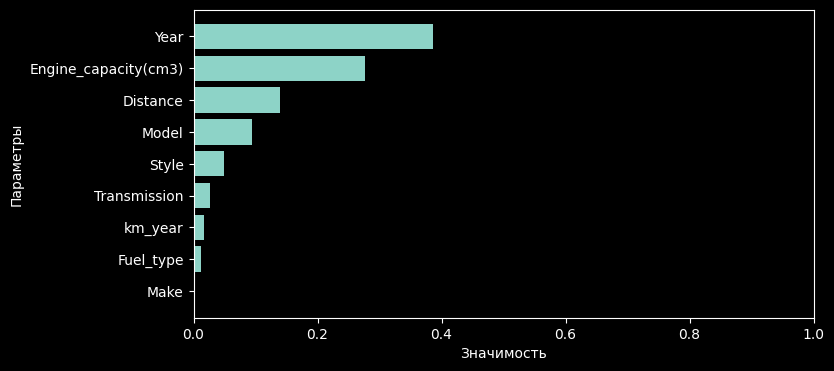

In [ ]:
feature_importance_plotter(ABR, features_names_reg)

In [ ]:
ABR.estimator_weights_

array([3.31223633, 2.92654569, 1.96024474, 1.0104572 , 0.91726491,
       0.81356465, 0.97634689, 0.64991056, 0.48081117, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Градиентный бустинг

In [ ]:
model_reg = xg.XGBRegressor(random_state = 42, objective= 'reg:squarederror',
                        learning_rate=0.01,
                        n_estimators=500)
model_reg.fit(X_reg_train,y_reg_train,
          eval_set=[(X_reg_train, y_reg_train), (X_reg_test, y_reg_test)]);

y_predict=model_reg.predict(X_reg_test)

[0]	validation_0-rmse:13171.17317	validation_1-rmse:13676.81333
[1]	validation_0-rmse:13055.85158	validation_1-rmse:13559.12044
[2]	validation_0-rmse:12941.89237	validation_1-rmse:13442.87543
[3]	validation_0-rmse:12829.11492	validation_1-rmse:13327.84749
[4]	validation_0-rmse:12717.61000	validation_1-rmse:13214.03034
[5]	validation_0-rmse:12607.30328	validation_1-rmse:13101.57736
[6]	validation_0-rmse:12498.27011	validation_1-rmse:12990.24692
[7]	validation_0-rmse:12390.42842	validation_1-rmse:12879.56776
[8]	validation_0-rmse:12283.74036	validation_1-rmse:12770.34193
[9]	validation_0-rmse:12178.31820	validation_1-rmse:12662.66536
[10]	validation_0-rmse:12073.99891	validation_1-rmse:12555.87622
[11]	validation_0-rmse:11970.91183	validation_1-rmse:12450.17112
[12]	validation_0-rmse:11868.90894	validation_1-rmse:12345.69232
[13]	validation_0-rmse:11768.11224	validation_1-rmse:12243.15642
[14]	validation_0-rmse:11668.36430	validation_1-rmse:12141.25075
[15]	validation_0-rmse:11569.79020	

In [ ]:
print("Лучшая Итерация: {}".format(model_reg.get_booster().best_iteration))

Лучшая Итерация: 999


In [ ]:
cross_validation (X_reg_train, y_reg_train,
                  model_reg, scoring_reg,
                 cv_reg)

regression_report(y_reg_test,y_predict)

[07:08:10] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[07:08:32] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[07:08:51] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[07:09:12] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[07:09:33] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,21.745047,0.047817,0.853201,-1.245670e+07,-1898.518833,-43592.804688
1,19.030994,0.047432,0.877729,-1.247291e+07,-1952.330267,-34536.152344
2,20.733975,0.047898,0.825329,-1.530183e+07,-1954.271092,-97750.869629
3,20.843478,0.054790,0.839835,-1.535196e+07,-1959.257976,-86710.795898
4,18.942382,0.048675,0.861396,-1.263574e+07,-1996.590081,-42334.990234




test_R2      8.514977e-01
test_-MSE   -1.364383e+07
test_-MAE   -1.952194e+03
test_Max    -6.098512e+04
dtype: float64
Ошибка на тестовых данных
MSE: 38332257.1
RMSE: 6191.3
R2 : 0.6078


**Значимые Параметры**

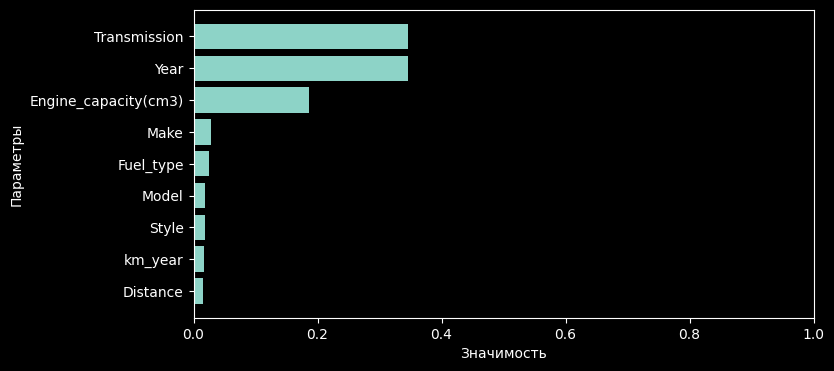

In [ ]:
feature_importance_plotter(model_reg, features_names_reg)

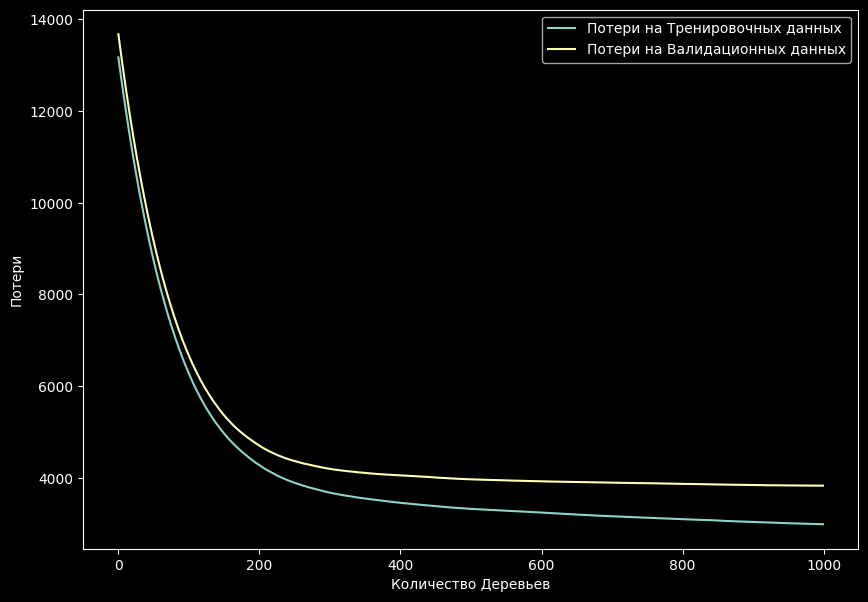

In [ ]:
results = model_reg.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Потери на Тренировочных данных")
plt.plot(results["validation_1"]["rmse"], label="Потери на Валидационных данных")
plt.xlabel("Количество Деревьев")
plt.ylabel("Потери")
plt.legend();

Наверное можно накатить количество Деревьев и /или увеличить Скорость обучения

# Контрольные вопросы